## **Ensembles**

Tree-based ensembles combine different trees using VOTING or AVERAGING to reduce the variance of trees. The different trees are obtained by changing the samples.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/Telco_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
## impute with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [4]:
## map Churn to yes: 1, no: 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [5]:
## dummy encode
df = pd.get_dummies(df, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [7]:
## Create X and y vector
X = df.drop('Churn', axis=1)
y = df['Churn']

In [8]:
## split 80% 20% random_state = 591
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=591)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
## Review, we performed GRIDSEARCH with CV to determine the best hyperparameters

## grid
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [4, 6, 8, None],
    'max_leaf_nodes' : [10, 16, 20, None]
}

## sklearn GridSearchCV
from sklearn.model_selection import GridSearchCV

## instance of the MODEL
dt = DecisionTreeClassifier()  ## unrestricted

## instace of the GRID wrapper - name this your model
dt_grid = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

## fit
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, None],
                         'max_leaf_nodes': [10, 16, 20, None]})

In [13]:
## 5 data sets
## 1 tree (fold 2,3,4,5) - (Estimate Accuracy: Fold1)
## 1 tree (fold 1,3,4,5) - (Estimate Accuracy: Fold2)
## best hyperameters are {}
2*4*4*5  ## 32 trees looped 5 times each

160

In [17]:
## this is the best tree out of the 32 options that were checked
dt_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=20)

In [18]:
## What are the best hyperparameters?
dt_grid.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': 20}

In [19]:
## What is the estimated accuracy of the BEST hyparameter tree?
## accuracy is the DEFAULT SCORE (you can use recall, precision, f1, any scorer that you want)
dt_grid.best_score_

0.7910898485581583

In [20]:
## you can predict the test data set
## 1) dt_grid.best_estimator_
## 2) dt_grid by default uses the best estimator
y_pred_tree = dt_grid.predict(X_test)

#### **Bagging Ensemble**

Bagging (Bootstrap Aggregating) uses the concept of bootstrap samples. Bootstrap samples are just sampled WITH replacement so that an observation can be in the sample MULTIPLE times.

In [21]:
from sklearn.ensemble import BaggingClassifier

In [22]:
## import under ensembles
from sklearn.ensemble import BaggingClassifier

## ideally you want a gridsearchcv here as well
## to give an example let's just fit a small bagging ensemble
## instance

bag = BaggingClassifier(estimator = DecisionTreeClassifier(criterion = "gini", max_depth = 1),
                        n_estimators = 3, random_state = 591, n_jobs = -1)

## fit on training
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=3,
                  n_jobs=-1, random_state=591)

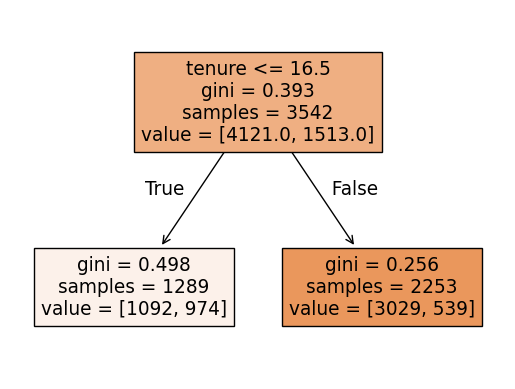

In [26]:
## tree # 1
from sklearn.tree import plot_tree
plot_tree (bag.estimators_[0], feature_names = X_train.columns, filled = True);

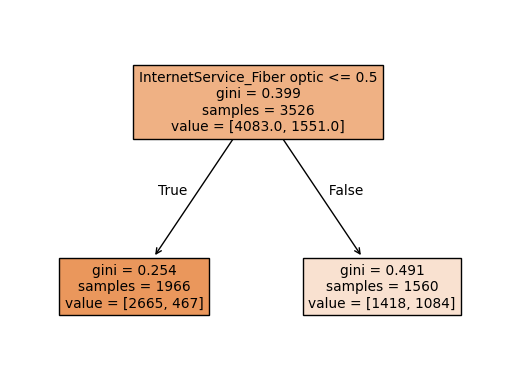

In [27]:
## tree # 2
from sklearn.tree import plot_tree
plot_tree (bag.estimators_[1], feature_names = X_train.columns, filled = True);

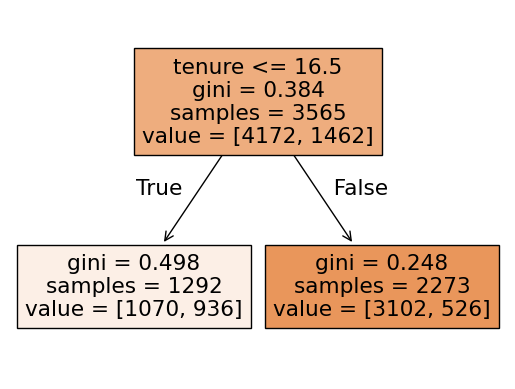

In [28]:
## tree # 3
from sklearn.tree import plot_tree
plot_tree (bag.estimators_[2], feature_names = X_train.columns, filled = True);

In [34]:
## How is the first observation on the test predicted
bag.predict_proba(X_test)[:,1][0]

0.45709866581947073

In [36]:
bag.estimators_[0].predict_proba(X_test)[:,1][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.4714424007744434

In [37]:
bag.estimators_[1].predict_proba(X_test)[:,1][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.43325339728217427

In [38]:
bag.estimators_[2].predict_proba(X_test)[:,1][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.4666001994017946